# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [75]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Makin' some data
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [93]:
# your code here
tic_tac = pd.read_csv("tic-tac-toe.csv")
tic_tac.head(10)

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True
5,x,x,x,x,o,o,b,b,o,True
6,x,x,x,x,o,b,o,o,b,True
7,x,x,x,x,o,b,o,b,o,True
8,x,x,x,x,o,b,b,o,o,True
9,x,x,x,x,b,o,o,o,b,True


#### Convert the categorical values to numeric in all columns.

In [94]:
columns_tic = list(tic_tac.columns)
columns_tic

['TL', 'TM', 'TR', 'ML', 'MM', 'MR', 'BL', 'BM', 'BR', 'class']

In [95]:
# Converting the strings to numbers:
tic_tac = tic_tac.replace({'x': 1, 'o': 0, 'b': 2, True: 1, False: 0})
tic_tac

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,1,1,1,1,0,0,1,0,0,1
1,1,1,1,1,0,0,0,1,0,1
2,1,1,1,1,0,0,0,0,1,1
3,1,1,1,1,0,0,0,2,2,1
4,1,1,1,1,0,0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...
953,0,1,1,1,0,0,0,1,1,0
954,0,1,0,1,1,0,1,0,1,0
955,0,1,0,1,0,1,1,0,1,0
956,0,1,0,0,1,1,1,0,1,0


In [96]:
tic_tac.dtypes

TL       object
TM       object
TR       object
ML       object
MM       object
MR       object
BL       object
BM       object
BR       object
class     int64
dtype: object

In [97]:
tic_tac[columns_tic] = tic_tac[columns_tic].apply(pd.to_numeric, errors='coerce')
tic_tac

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,1,1,1,1,0,0,1,0,0,1
1,1,1,1,1,0,0,0,1,0,1
2,1,1,1,1,0,0,0,0,1,1
3,1,1,1,1,0,0,0,2,2,1
4,1,1,1,1,0,0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...
953,0,1,1,1,0,0,0,1,1,0
954,0,1,0,1,1,0,1,0,1,0
955,0,1,0,1,0,1,1,0,1,0
956,0,1,0,0,1,1,1,0,1,0


In [98]:
tic_tac.dtypes

TL       int64
TM       int64
TR       int64
ML       int64
MM       int64
MR       int64
BL       int64
BM       int64
BR       int64
class    int64
dtype: object

#### Separate the inputs and output

In [99]:
## import data
from sklearn.model_selection import train_test_split

# Separating the input and output data:

X = tic_tac.drop(['class'], axis = 1)
y = tic_tac['class']


#### Normalize the input data.

In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

#### Split training and test data

In [101]:
# your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [102]:
X_train = X_train.reshape((-1, 9))
X_test = X_test.reshape((-1, 9))

#### Create Sequential Model

In [103]:
model = Sequential([
  Dense(64, activation='relu', input_shape=(9,)), 
  Dense(64, activation='relu'),
  Dense(2, activation='softmax'),  
])

#### Compile the model

In [104]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

#### Fit Training data

In [105]:
# Train the model (this is the fit part)
history = model.fit(
  X_train,
  to_categorical(y_train),
  epochs=5,
  batch_size=32,
)

Epoch 1/5
766/766 [==============================] - 0s 166us/step - loss: 0.6647 - accuracy: 0.6097
Epoch 2/5
766/766 [==============================] - 0s 43us/step - loss: 0.5926 - accuracy: 0.6971
Epoch 3/5
766/766 [==============================] - 0s 45us/step - loss: 0.5529 - accuracy: 0.7285
Epoch 4/5
766/766 [==============================] - 0s 49us/step - loss: 0.5232 - accuracy: 0.7480
Epoch 5/5
766/766 [==============================] - 0s 44us/step - loss: 0.4928 - accuracy: 0.7598


In [106]:
# Evaluate the model (here you have the test input data and the test labels)
model.evaluate(
  X_test,
  to_categorical(y_test)
)

192/192 [==============================] - 0s 170us/step


[0.5185942302147547, 0.6979166865348816]

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [107]:
# your code here

# Save the model to disk.
model.save_weights('model.tictac')

In [108]:
# Load the model from disk later using:
model.load_weights('model.tictac')

In [111]:
# Predict on the first 5 items
predictions = model.predict(X_test[:5])

In [112]:
# Print our model's predictions.
print(np.argmax(predictions, axis=1))

[1 1 1 1 1]


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

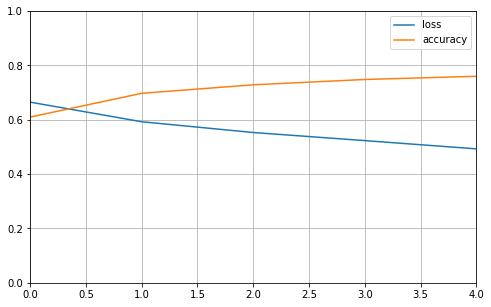

In [113]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

#### When adding more lines

In [114]:
# your code here

model_2 = Sequential([
  Dense(64, activation='relu', input_shape=(9,)), 
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(2, activation='softmax'),  
])

In [115]:
# Compile the model.
model_2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [116]:
# Train the model (this is the fit part)
history = model_2.fit(
  X_train,
  to_categorical(y_train),
  epochs=5,
  batch_size=32,
)

Epoch 1/5
766/766 [==============================] - 0s 276us/step - loss: 0.6389 - accuracy: 0.6540
Epoch 2/5
766/766 [==============================] - 0s 53us/step - loss: 0.5703 - accuracy: 0.6932
Epoch 3/5
766/766 [==============================] - 0s 48us/step - loss: 0.4997 - accuracy: 0.7650
Epoch 4/5
766/766 [==============================] - 0s 45us/step - loss: 0.4199 - accuracy: 0.7898
Epoch 5/5
766/766 [==============================] - 0s 42us/step - loss: 0.3332 - accuracy: 0.8564


#### Changing the optimizer

In [117]:
model_3 = Sequential([
  Dense(64, activation='relu', input_shape=(9,)), 
  Dense(64, activation='relu'),
  Dense(2, activation='softmax'),  
])

In [118]:
# Compile the model.
model_3.compile(
  optimizer='adagrad',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [119]:
# Train the model (this is the fit part)
history = model_3.fit(
  X_train,
  to_categorical(y_train),
  epochs=5,
  batch_size=32,
)

Epoch 1/5
766/766 [==============================] - 0s 128us/step - loss: 0.5923 - accuracy: 0.6815
Epoch 2/5
766/766 [==============================] - 0s 50us/step - loss: 0.5109 - accuracy: 0.7311
Epoch 3/5
766/766 [==============================] - 0s 34us/step - loss: 0.4686 - accuracy: 0.7480
Epoch 4/5
766/766 [==============================] - 0s 36us/step - loss: 0.4378 - accuracy: 0.7768
Epoch 5/5
766/766 [==============================] - 0s 39us/step - loss: 0.4114 - accuracy: 0.7990


#### Changing the epochs

In [121]:
model_4 = Sequential([
  Dense(64, activation='relu', input_shape=(9,)), 
  Dense(64, activation='relu'),
  Dense(2, activation='softmax'),  
])

In [122]:
# Compile the model.
model_4.compile(
  optimizer='adagrad',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [123]:
# Train the model (this is the fit part)
history = model_4.fit(
  X_train,
  to_categorical(y_train),
  epochs=10,
  batch_size=32,
)

Epoch 1/10
766/766 [==============================] - 0s 301us/step - loss: 0.5874 - accuracy: 0.6789
Epoch 2/10
766/766 [==============================] - 0s 47us/step - loss: 0.4975 - accuracy: 0.7467
Epoch 3/10
766/766 [==============================] - 0s 37us/step - loss: 0.4583 - accuracy: 0.7598
Epoch 4/10
766/766 [==============================] - 0s 35us/step - loss: 0.4286 - accuracy: 0.7885
Epoch 5/10
766/766 [==============================] - 0s 39us/step - loss: 0.4035 - accuracy: 0.7950
Epoch 6/10
766/766 [==============================] - 0s 42us/step - loss: 0.3834 - accuracy: 0.8185
Epoch 7/10
766/766 [==============================] - 0s 41us/step - loss: 0.3688 - accuracy: 0.8290
Epoch 8/10
766/766 [==============================] - 0s 51us/step - loss: 0.3506 - accuracy: 0.8446
Epoch 9/10
766/766 [==============================] - 0s 41us/step - loss: 0.3391 - accuracy: 0.8538
Epoch 10/10
766/766 [==============================] - 0s 41us/step - loss: 0.3271 - accur

**Which approach(es) did you find helpful to improve your model performance?**

In [110]:
# your answer here

In [ ]:
'''
Adding more lines, changing the optimizer and changing the epochs makes the accuracy better.
Doing it all together will be good to optimize the model´s performance.
'''